# Исследование недвижимости Санкт-Петербурга

## Описание проекта

Нужно научиться определять рыночную стоимость объектов недвижимости.

## Обзор данных

### Импорт данных

In [1]:
# Анализ данных
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime, timedelta
from IPython.display import display


In [2]:
display(df.head())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Стоит обратить внимание:**
- Уже при первом осмотре видны NaN. 
- В датах публикации не указано время. Допустим, что это не ошибка.
- Тип аппартаментов не указан, много пропусков.
- Некоторые столбцы написаны вреблюжим методом

### Описание данных

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

### Пропущенные значения:

In [3]:
# Процент пропущенных значений
df.isna().mean()


total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Пропуски**:
- `is_apartment` имеет не булеевый тип данных. Что то не так.
- Данные столбцов `ceiling_height`,`floors_total`,`living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` утрачены.
- "Всего этажей" указаны вещественным значением. Тоже касается "Количества балконов", так же чисел парков и водоемов в радиусе 3 км.
- Расстояние до ближайшего аэропорта, в том числе ближайшие обьекты, указаны в метрах вещественным, а не целочисленным значением. Врятли, кто то будет указывать расстояние от обьекта недвижимости до аэропорта с точностью до сантиметра.

### Числовое описание данных методом describe()

In [5]:
df.describe().round()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.0,23699.0,23699.0,23699.0,14504.0,23613.0,21796.0,23699.0,21421.0,12180.0,18157.0,18180.0,18181.0,8079.0,18181.0,9110.0,20518.0
mean,10.0,6541549.0,60.0,2.0,3.0,11.0,34.0,6.0,11.0,1.0,28794.0,14191.0,1.0,491.0,1.0,518.0,181.0
std,6.0,10887013.0,36.0,1.0,1.0,7.0,22.0,5.0,6.0,1.0,12631.0,8608.0,1.0,342.0,1.0,278.0,220.0
min,0.0,12190.0,12.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,3400000.0,40.0,1.0,3.0,5.0,19.0,2.0,7.0,0.0,18585.0,9238.0,0.0,288.0,0.0,294.0,45.0
50%,9.0,4650000.0,52.0,2.0,3.0,9.0,30.0,4.0,9.0,1.0,26726.0,13098.0,0.0,455.0,1.0,502.0,95.0
75%,14.0,6800000.0,70.0,3.0,3.0,16.0,42.0,8.0,12.0,2.0,37273.0,16293.0,1.0,612.0,1.0,729.0,232.0
max,50.0,763000000.0,900.0,19.0,100.0,60.0,410.0,33.0,112.0,5.0,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0


**Обзор характеристики данных**:
- есть обьекты без фотографий. Вполне допустимо.
- в таблице обьекты без комнат. Здесь ошибка.
- высота потолков 1 м? Здесь ошибка.
- жилая территория всего 2 метра? Вероятно ошибка.
- квартиры не могут находится на территории аэропорта.
- числа водоемов и парков в радиусе 3 км не могут быть равны нулю если столбцы parks_nearest и ponds_nearest меньше 3000м. Так как столбы начинают противоречить друг другу. parks_around3000 и ponds_around3000 могут иметь пропуски.
- все вещественные значения таблицы можно перевести в целочисленные для комфортной аналитики без ущерба данным.


### Итог по обзору данных:
- Множество пустых значений по всей таблице. 
- Некоторые названия столбцов написаны вреблюжим методом.
- Некоторые столбцы с вещественными значениями можно перевести в целочисленные для комфортной аналитики без ущерба данным.

## Предобработка данных

### Предобработка данных. Заполнение пропущенных значений

Исправим название столбца с ошибкой.

In [6]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})


#### Пропущенные значения с логической заменой.

Вероятной причиной пропусков служит человеческий фактор - человек не привык указывать то чего нет, только то, что есть.
Здесь будет правильно использовать логическую замену, то есть заменить на ноль.

In [7]:
#Пропущенные значения с логичской заменой. Такие пропуски правильно заменить на 0.
df['floors_total'] = df.floors_total.fillna(1)         # не указано, значит нет других этажей
df['balcony'] = df.balcony.fillna(0)                   # не указано, значит нет блаконов
df['is_apartment'] = df['is_apartment'].fillna(False)  # не является апартаментами


Проверим нет ли аномальных расхождений данных столбцов floors_total и floor. В одноэтажных зданиях этаж может быть только один.

In [8]:
df.query('floors_total == 1')['floor'].unique()


array([ 4,  1, 12,  8,  9, 22, 15,  6,  7,  3, 18, 13, 24, 21, 11,  2,  5,
       19, 20, 14, 17, 23, 10])

In [113]:
len(df.query('floors_total < floor'))


59

#### Пропуски `locality_name`

Займемся поиском проблем самого важного для таблицы столбца `locality_name`. Относительно `locality_name` можно будет более корректно находить медиану для пропусков в других столбцах.

In [9]:
df = df.dropna(subset=['locality_name']) # потери меньше процента
df['locality_name'].sort_values().unique()


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Указания типа населенного пункта могут создавать дубликаты и некоторые из них слишком длинные. Исправим это.

In [10]:
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок')
df['locality_name'] = df['locality_name'].str.replace('городской посёлок ', 'посёлок городского типа ')
df['locality_name'] = df['locality_name'].str.replace('посёлок при железнодорожной станции ', 'посёлок станции ')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество ', 'садовое товарищество ')

def locality_name_correction(name):
    
    name = 'г. ' + name
    
    replace_name=[
        'г. посёлок городского типа',
        'г. посёлок станции',
        'г. садовое товарищество',
        'г. село', 
        'г. деревня',
        'г. коттеджный посёлок', 
        'г. посёлок']
    for value in replace_name:
        if value in name:
            return name.replace(value,'с/п')
    return name
df['locality_name']=df['locality_name'].apply(locality_name_correction)


In [11]:
df['locality_name'].sort_values().unique()


array(['г. Бокситогорск', 'г. Волосово', 'г. Волхов', 'г. Всеволожск',
       'г. Выборг', 'г. Высоцк', 'г. Гатчина', 'г. Зеленогорск',
       'г. Ивангород', 'г. Каменногорск', 'г. Кингисепп', 'г. Кириши',
       'г. Кировск', 'г. Колпино', 'г. Коммунар', 'г. Красное Село',
       'г. Кронштадт', 'г. Кудрово', 'г. Лодейное Поле', 'г. Ломоносов',
       'г. Луга', 'г. Любань', 'г. Мурино', 'г. Никольское',
       'г. Новая Ладога', 'г. Отрадное', 'г. Павловск', 'г. Петергоф',
       'г. Пикалёво', 'г. Подпорожье', 'г. Приморск', 'г. Приозерск',
       'г. Пушкин', 'г. Санкт-Петербург', 'г. Светогорск', 'г. Сертолово',
       'г. Сестрорецк', 'г. Сланцы', 'г. Сосновый Бор', 'г. Сясьстрой',
       'г. Тихвин', 'г. Тосно', 'г. Шлиссельбург', 'с/п Агалатово',
       'с/п Александровская', 'с/п Алексеевка', 'с/п Аннино', 'с/п Аро',
       'с/п Барышево', 'с/п Батово', 'с/п Бегуницы', 'с/п Белогорка',
       'с/п Белоостров', 'с/п Большая Вруда', 'с/п Большая Ижора',
       'с/п Большая Пуст

#### Сводная таблица.

Пропуски других столбцов можно заполнить медианным значением по столбцу `locality_name`. Для этого составим сводную таблицу и оценим, что из этого поможет нам восстановить данные.

In [12]:
pivot_df = df.pivot_table(index = 'locality_name', 
               values=['last_price', 'total_area', 'living_area', 'kitchen_area','airports_nearest', 'city_centers_nearest','parks_nearest','parks_around3000', 'ponds_nearest','ponds_around3000'], 
              aggfunc='median')
pivot_df


,airports_nearest,city_centers_nearest,kitchen_area,last_price,living_area,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_area
locality_name,,,,,,,,,,
г. Бокситогорск,NaN,NaN,6.00,785000.0,29.50,NaN,NaN,NaN,NaN,44.50
г. Волосово,NaN,NaN,8.30,1800000.0,29.80,NaN,NaN,NaN,NaN,49.55
г. Волхов,NaN,NaN,6.80,1600000.0,30.30,NaN,NaN,NaN,NaN,48.00
г. Всеволожск,NaN,NaN,10.00,3450000.0,30.00,NaN,NaN,NaN,NaN,53.55
г. Выборг,NaN,NaN,8.00,2897000.0,30.00,NaN,NaN,NaN,NaN,50.20
...,...,...,...,...,...,...,...,...,...,...
с/п Яльгелево,NaN,NaN,6.75,2600000.0,28.90,NaN,NaN,NaN,NaN,44.90
с/п Ям-Тесово,NaN,NaN,8.50,625000.0,17.30,NaN,NaN,NaN,NaN,44.75
с/п Янино-1,NaN,NaN,10.40,3184004.0,22.50,NaN,NaN,NaN,NaN,47.40


In [13]:
pivot_df.isna().mean()


airports_nearest        0.912621
city_centers_nearest    0.912621
kitchen_area            0.058252
last_price              0.000000
living_area             0.051780
parks_around3000        0.912621
parks_nearest           0.961165
ponds_around3000        0.912621
ponds_nearest           0.938511
total_area              0.000000
dtype: float64

Из сводной таблицы делаем вывод, что люди при выставлении объявления о продаже обязательно указывают цену и площадь, но практически никогда не указывают наличие поблизости аэропорта, центра города, парка и водоемов. Вероятно эти параметры появились у Яндекс.Недвижимости недавно и только в новых обявлениях эти данные указаны.

Проверим эту теорию о новых функциях Яндекс.Недвижимости.

In [14]:
df.sort_values('first_day_exposition')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,False,...,23.43,2.0,г. Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
13246,1,14000000.0,142.00,2014-11-27T00:00:00,3,2.77,5.0,95.70,4,False,...,14.30,1.0,г. Санкт-Петербург,38184.0,11755.0,1.0,19.0,1.0,77.0,1341.0
3291,8,8200000.0,52.50,2014-11-27T00:00:00,1,NaN,8.0,21.50,2,False,...,15.10,0.0,г. Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
10132,2,16137000.0,154.76,2014-11-27T00:00:00,4,2.70,20.0,67.81,20,False,...,32.55,0.0,г. Санкт-Петербург,18490.0,17492.0,0.0,NaN,2.0,113.0,573.0
15427,2,3550000.0,34.00,2014-11-27T00:00:00,1,2.55,9.0,18.90,7,False,...,6.00,1.0,г. Санкт-Петербург,13430.0,14405.0,1.0,500.0,1.0,504.0,1149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12208,7,9000000.0,60.30,2019-05-03T00:00:00,2,3.25,5.0,36.90,4,False,...,5.80,4.0,г. Санкт-Петербург,32302.0,4662.0,1.0,398.0,0.0,NaN,NaN
15881,9,2100000.0,35.80,2019-05-03T00:00:00,1,2.50,5.0,18.00,5,False,...,7.00,1.0,с/п Ленинское,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9217,7,4300000.0,35.70,2019-05-03T00:00:00,1,2.70,21.0,15.00,12,False,...,13.00,2.0,г. Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,10,5100000.0,51.00,2019-05-03T00:00:00,1,NaN,9.0,15.00,2,False,...,25.00,0.0,г. Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь мы знаем, что это не новая функция Яндекс.Недвижимости указывать важные места от объекта. Еще одной причиной может служить человеческий фактор. Кто то забывает или умышленно не заполняет эти пункты объявления ради выгоды.

#### Запонение `days_exposition`

(0.0, 1000.0)

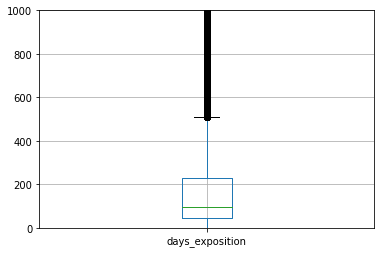

In [15]:
df.boxplot('days_exposition')
plt.ylim(0,1000)


In [16]:
df['days_exposition'].isna().mean()


0.13446088794926003

In [17]:
df = df.dropna(subset=['days_exposition'])


Мы не можем знать сколько времени распологалось объявление, так как нет столбца с датами закрытия. Возможно строки с пропуками - это не закрытые объявления. Может и техническая ошибка. Пропущенных данных 13%. Заполняя медианой, есть риск исказить результаты дальнейшего анализа. Удалим пропуски.

#### Заполнение пропусков.

In [18]:
groupby_locality_name = df.groupby('locality_name')[['parks_nearest','ponds_nearest','airports_nearest','city_centers_nearest']].median()
groupby_locality_name


,parks_nearest,ponds_nearest,airports_nearest,city_centers_nearest
locality_name,,,,
г. Бокситогорск,NaN,NaN,NaN,NaN
г. Волосово,NaN,NaN,NaN,NaN
г. Волхов,NaN,NaN,NaN,NaN
г. Всеволожск,NaN,NaN,NaN,NaN
г. Выборг,NaN,NaN,NaN,NaN
...,...,...,...,...
с/п Яльгелево,NaN,NaN,NaN,NaN
с/п Ям-Тесово,NaN,NaN,NaN,NaN
с/п Янино-1,NaN,NaN,NaN,NaN


Не у всех населенных пунктов есть парк, водоем, аэропорт. И только у городов есть центр города. Пропуски геоданных оставим как есть, так как для их заполнения недостаточно информации а строки могут пригодится.

Высоту потолков заполним медианой.

Найдем соотношение столбцов `living_area` и `kitchen_area` к `total_area`. Это позволит заполнить пробелы более корректно, чем медианой. Значения кухни и жилой зоны не будут выходить за пределы общей площади.

In [19]:
living_share = df['living_area'].median()/df['total_area'].median()
kitchen_share = df['kitchen_area'].median()/df['total_area'].median()

print('Соотношение жилой площади к общей:',living_share)
print('Соотношение кухни к общей площади:',kitchen_share)

df['living_area'] = df['living_area'].fillna(df['total_area']*living_share)
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*kitchen_share)

df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())


Соотношение жилой площади к общей: 0.5905511811023623
Соотношение кухни к общей площади: 0.17913385826771655


#### Причины пропусков:

*Вероятной причиной пропусков служит человеческий фактор. Люди стремятся получить больше выгоды с продажи недвижимости. Яндекс позволяет поднять рейтинг объявления за счет заполнения дополнительных пунктов. Можно указать наличие поблизости парков, аэропортов и водоемов. Если рядом их нет, человек просто не будет заполнять эти пункты. То есть столбцы будут иметь значение NaN и False.*

*Отсутствие балкона, дальность от центра или парка и тому подобное могут снизить привлекательность объявления. Эти пункты намеренно оставляют пустыми.*

###  Предобработка данных. Приведение данных к нужным типам

Приведем данные к нужным типам.

In [20]:
# Предобработка дат из object в datetime64 методом to_datetime() Пример из таблицы: 2019-03-07T00:00:00
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Предобработка вещественных значений в целочисленные
float_columns_to_convert = ['floors_total', 'balcony', 'days_exposition']
for column in float_columns_to_convert:
        df[column] = df[column].astype(int)

rounding_columns = ['living_area','kitchen_area','airports_nearest', 'city_centers_nearest']
for column in rounding_columns:
        df[column] = df[column].round()
        

 Данные о парках, прудах, фотографии для исследования не нужны, от них мы избавимся.

In [21]:
days_exposition = df['days_exposition']
df = df.loc[:,'last_price':'city_centers_nearest']
df['days_exposition'] = days_exposition


#### Пояснение

*Столбцам которые указывают расстояние в метрах до обьекта не требуется точность до сантиметров. Например, расстояние от обьекта недвижимости до аэропорта. 
Количество дней с момента публикации объявления комфортнее воспринимается в сутках без остатка.
Так же столбцам с неделимыми значениями вещественный тип не нужен. Балкон либо есть, либо отсутствует.
Целочисленные значения проще воспринимаются.*

**Итог: убрали лишние нули после запятой.**

### Итог предобработки

In [22]:
display(df.head())


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,days_exposition
1,3350000.0,40.4,2018-12-04,1,2.65,11,19.0,1,False,False,False,11.0,2,с/п Шушары,12817.0,18603.0,81
2,5196000.0,56.0,2015-08-20,2,2.65,5,34.0,4,False,False,False,8.0,0,г. Санкт-Петербург,21741.0,13933.0,558
3,64900000.0,159.0,2015-07-24,3,2.65,14,94.0,9,False,False,False,28.0,0,г. Санкт-Петербург,28098.0,6800.0,424
4,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,г. Санкт-Петербург,31856.0,8098.0,121
5,2890000.0,30.4,2018-09-10,1,2.65,12,14.0,5,False,False,False,9.0,0,с/п Янино-1,NaN,NaN,55


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20470 entries, 1 to 23697
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            20470 non-null  float64       
 1   total_area            20470 non-null  float64       
 2   first_day_exposition  20470 non-null  datetime64[ns]
 3   rooms                 20470 non-null  int64         
 4   ceiling_height        20470 non-null  float64       
 5   floors_total          20470 non-null  int64         
 6   living_area           20470 non-null  float64       
 7   floor                 20470 non-null  int64         
 8   is_apartment          20470 non-null  bool          
 9   studio                20470 non-null  bool          
 10  open_plan             20470 non-null  bool          
 11  kitchen_area          20470 non-null  float64       
 12  balcony               20470 non-null  int64         
 13  locality_name   

- Заполнили и исправли ключевые столбцы исследования: 
-- `city_centers_nearest`, 
-- `days_exposition`, 
-- `living_area`, 
-- `kitchen_area`, 
-- `ceiling_height`, 
-- `floors_total`, 
-- `balcony`, 
-- `first_day_exposition`,
-- `is_apartment`.
- Округлили цифры, что бы таблица была компактнее и проще воспринималась.
- Данные о парках, прудах и фотографии удалены за ненадобностью.

Таблица готова к исследованию.

## Расчет данных. Добавление столбцов

Расчитаем цену квадратного метра.

In [24]:
df['square_meter_price']=(df['last_price']/df['total_area']).round()


Расчитаем день недели, месяц и год публикации объявления.

In [25]:
df['day_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).day
df['weekday_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year


Расчитаем этаж квартиры; варианты — первый, последний, другой.

In [26]:
df['floor'] = df['floor'].replace(0,1)


In [27]:
def floor_group(row):
    
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor != 1 and floor != floors_total:
        return 'другой'
    elif floor != 1 and floor == floors_total:
        return 'последний'

df['floor_group'] = df.apply(floor_group, axis=1)

df[['floors_total','floor','floor_group']][0:5]


,floors_total,floor,floor_group
1,11,1,первый
2,5,4,другой
3,14,9,другой
4,14,13,другой
5,12,5,другой


Расчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [28]:
df['residential-total_ratio'] = df['living_area']/df['total_area']
df['kitchen-total_ratio'] = df['kitchen_area']/df['total_area']


### Итог

- *Применение общей цены объекта негативно скажется на точности исследования зависимости цен от других факторов. Для этих задач лучше подойдет цена квадратного метра.*
- *Возможно цены зависят от сезонности. Что бы это определить мы разбили столбец даты размещения на отдельные части.*
- *Группировка этажей по типам поможет нам определить зависимость цены от этажа при исследовании.*
- *Соотношение жилой и общей площади к общей площади так же могут влиять на цену.*

## Исследовательский анализ данных

Изучим следующие параметры: площадь `total_area`, цена `last_price`, число комнат `rooms`, высота потолков `ceiling_height`. Построим гистограммы для каждого параметра.

### Площадь квартиры в квадратных метрах (м²)

(0.0, 200.0)

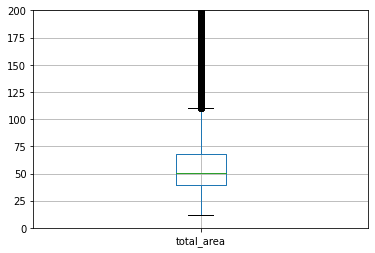

In [29]:
df.boxplot('total_area')
plt.ylim(0,200)


<AxesSubplot:>

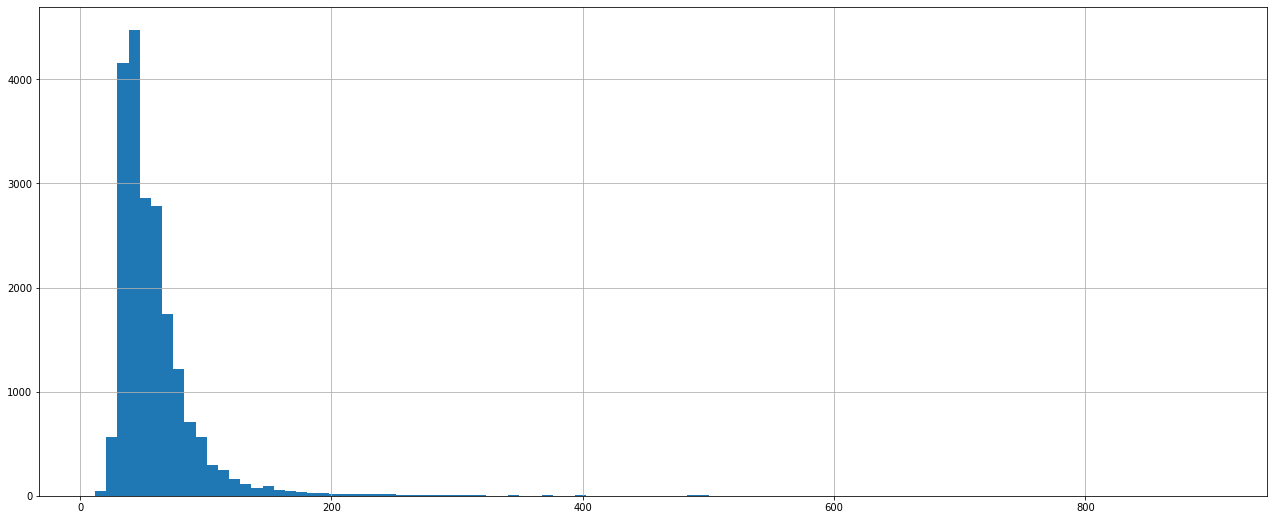

In [30]:
df['total_area'].hist(bins=100,figsize = (22, 9))


**Общая площадь** в основном составляет до 200 метров квадратных, реже до до 400. Квартиры с малой площадью выставляются намного чаще.

### Цена на момент снятия с публикации

(0.0, 250000.0)

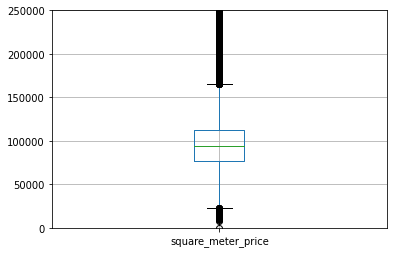

In [31]:
df.boxplot('square_meter_price')
plt.ylim(0,250000)


<AxesSubplot:>

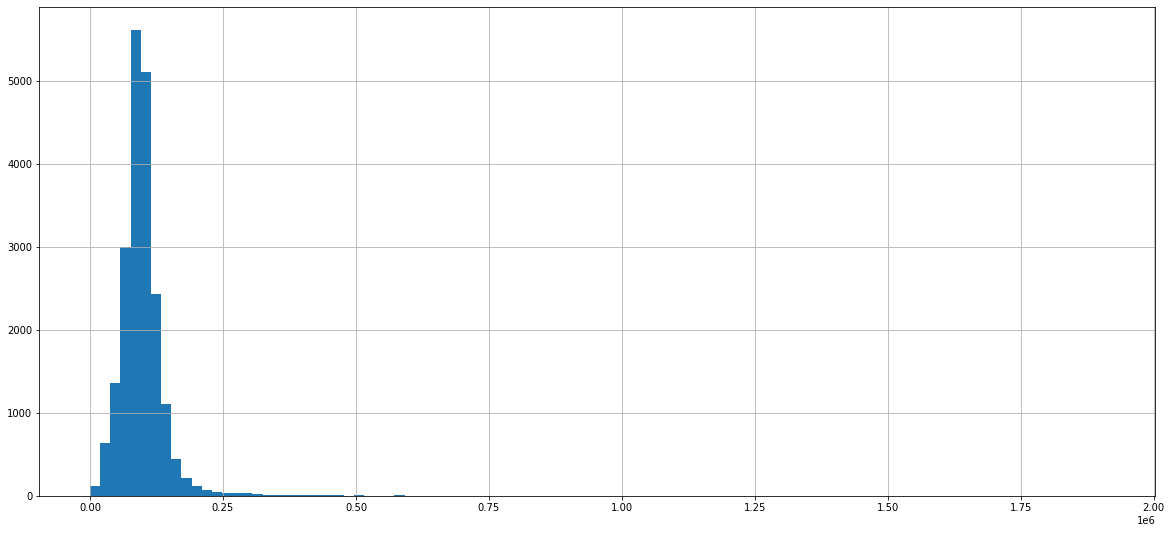

In [32]:
df['square_meter_price'].hist(bins=100,figsize = (20, 9))


In [33]:
print('Min:',df['square_meter_price'].min())
print('Max:',df['square_meter_price'].max())


Min: 112.0
Max: 1907500.0


**Вывод**: Минимальная цена за кв.м - 112 рублей. Максимальная цена за кв.м - 1,907,500 рублей.

### Число комнат

(0.0, 15.0)

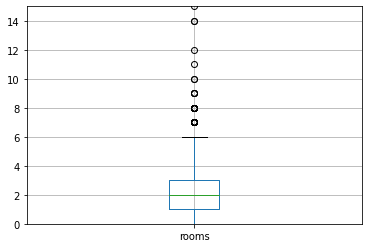

In [34]:
df.boxplot('rooms')
plt.ylim(0,15)


<AxesSubplot:>

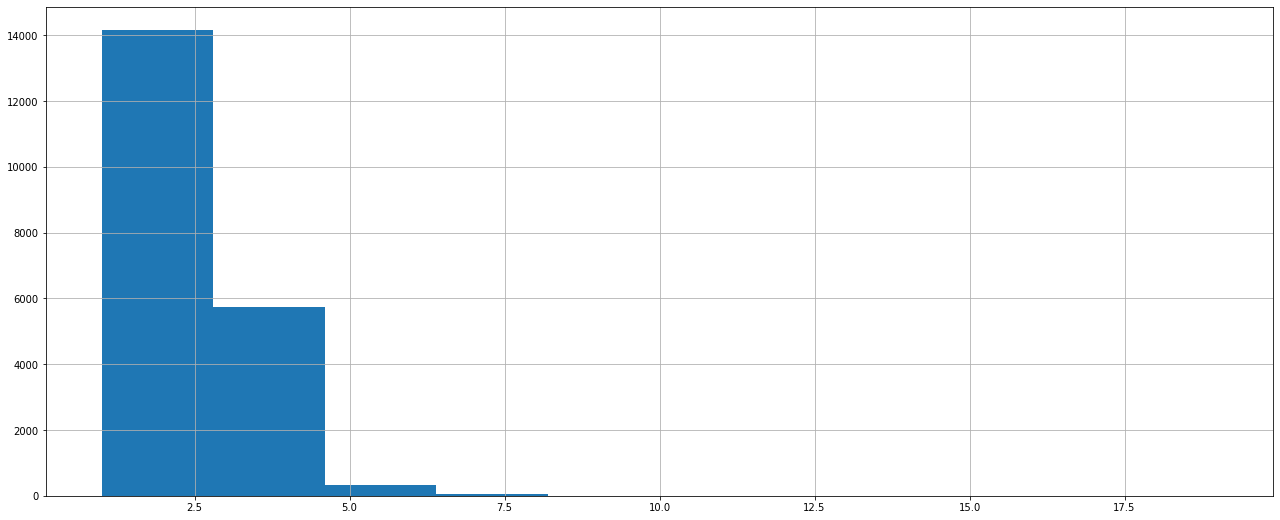

In [35]:
df = df.query('1 <= rooms')
df['rooms'].hist(figsize = (22, 9))


**Число комнат** чаще всего от 1 до 3 на объект недвижимости.

In [36]:
df.groupby('rooms')['square_meter_price'].median().sort_values()


rooms
9      85793.5
19     86092.0
3      87700.0
4      90470.0
2      91667.0
14     92828.0
5      96084.5
6      99312.5
1      99769.5
10    104828.5
16    105556.0
8     106187.0
15    110169.0
7     111165.0
11    170015.0
12    466667.0
Name: square_meter_price, dtype: float64

**Вывод**: Дорого - 12 комнат. Дешево - 19 комнат.

### Высота потолков (м)

(0.0, 5.0)

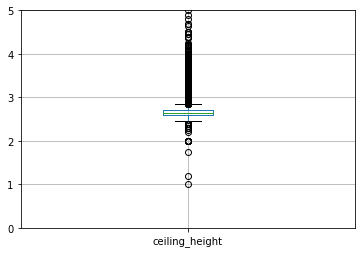

In [37]:
df.boxplot('ceiling_height')
plt.ylim(0,5)


<AxesSubplot:>

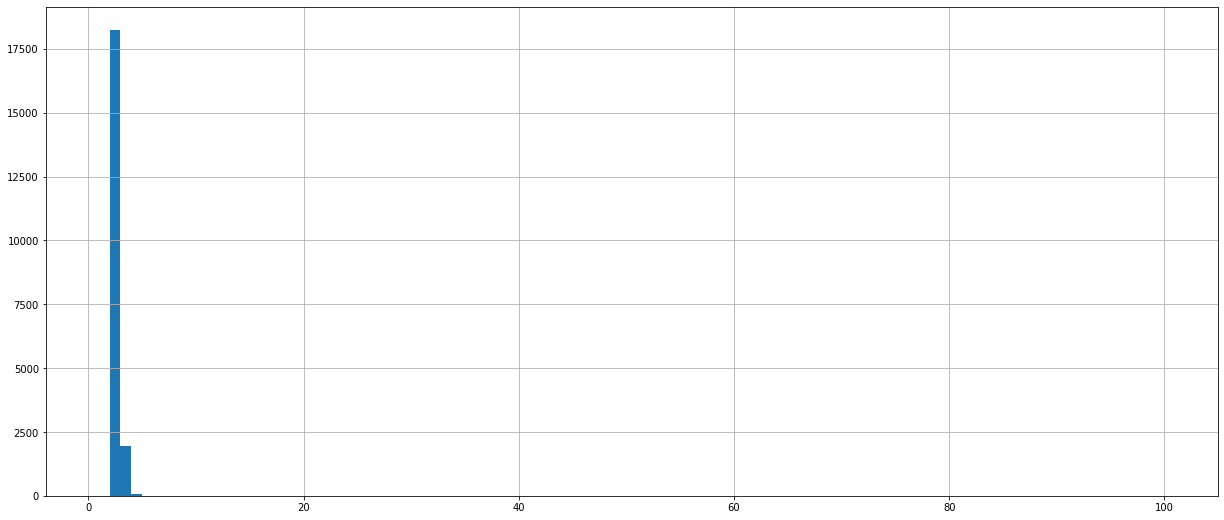

In [38]:
df['ceiling_height'].hist(bins=100, figsize = (21, 9))


**Высота потолков (м)** от 2 до 3 метров в среднем.

In [39]:
df.groupby('ceiling_height')['square_meter_price'].median().sort_values()


ceiling_height
5.00       18966.0
1.20       35047.0
2.25       39249.0
2.30       40821.5
2.34       46809.0
            ...   
3.82      406056.0
4.90      491447.0
100.00    600000.0
6.00      634328.0
3.85      660000.0
Name: square_meter_price, Length: 175, dtype: float64

**Вывод**: Дорого - 3.85 метров высоты. Дешево - 5 метров высоты.

### Время продажи квартиры

Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану.

Определим границы методом `describe()`.

In [40]:
df.days_exposition.describe()


count    20287.000000
mean       181.398827
std        220.147815
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

*Срок продаж составляет 1 - 1600 дней с момента объявления, без учета выбросов.*

Выведем диаграмму размаха для `days_exposition`, что бы определить выбросы.

(0.0, 1500.0)

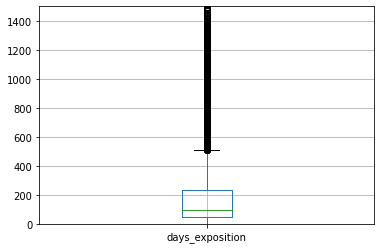

In [41]:
df.boxplot('days_exposition')
plt.ylim(0,1500)


*Большинство продаж осуществляется до 200 дней. Объявления сроком более 500 дней составляют выборсы.*

Составим гистограмму сроком до 500 дней.

<AxesSubplot:>

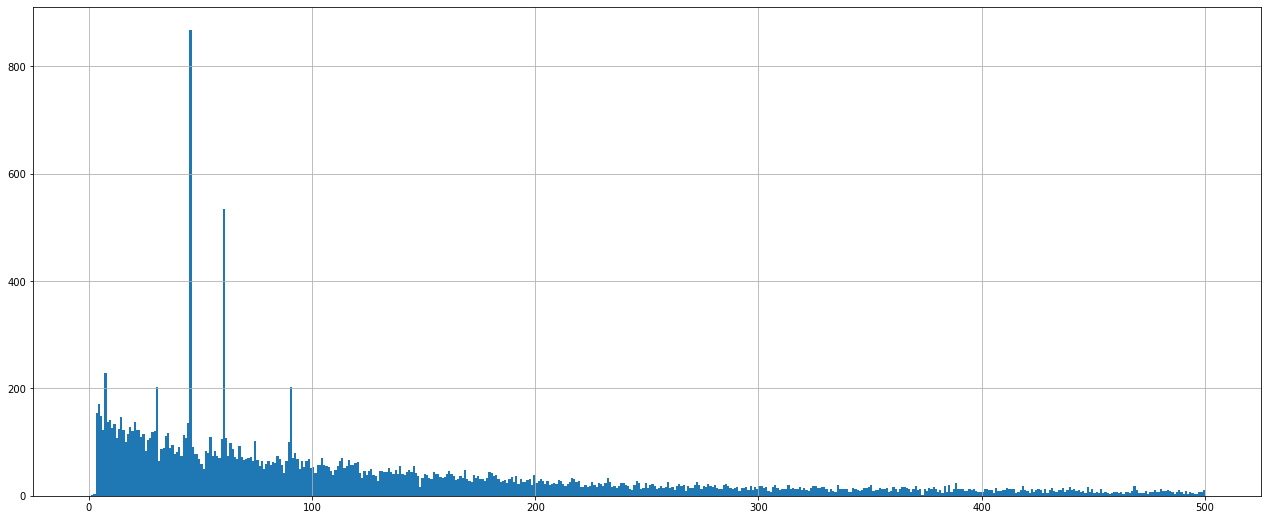

In [42]:
df.days_exposition.hist(bins=500, figsize = (22, 9), range = (0,500))


График портят редкие и выбивающиеся значения, уберем их.

In [43]:
df['days_exposition'].value_counts()


45      868
60      534
7       228
30      202
90      202
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1141, dtype: int64

Создадим отфильтрованные данные без аномальных значений. Найдем среднее и медиану.

In [44]:
df = df.query('days_exposition != [45, 60, 7, 30, 90]')
print('Средний срок продаж по объявлению:', df['days_exposition'].mean())
print('Медиана продаж:', df['days_exposition'].median())


Средний срок продаж по объявлению: 196.30208732811045
Медиана продаж: 114.0


**Вывод:** *В среднем каждая сделка заключается за 100-200 дней. Можно считать, что продажи прошли очень быстро если они совершены до 100 дней с момента публикации объявления и необычно долго 200-500 дней.*

### Цена квадратного метра.

(10000.0, 250000.0)

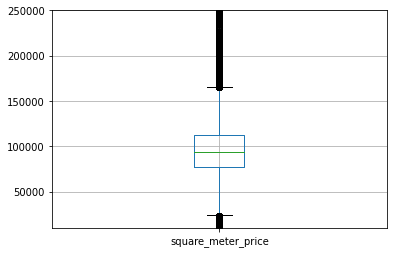

In [45]:
df.boxplot('square_meter_price')
plt.ylim(10000,250000)


<AxesSubplot:>

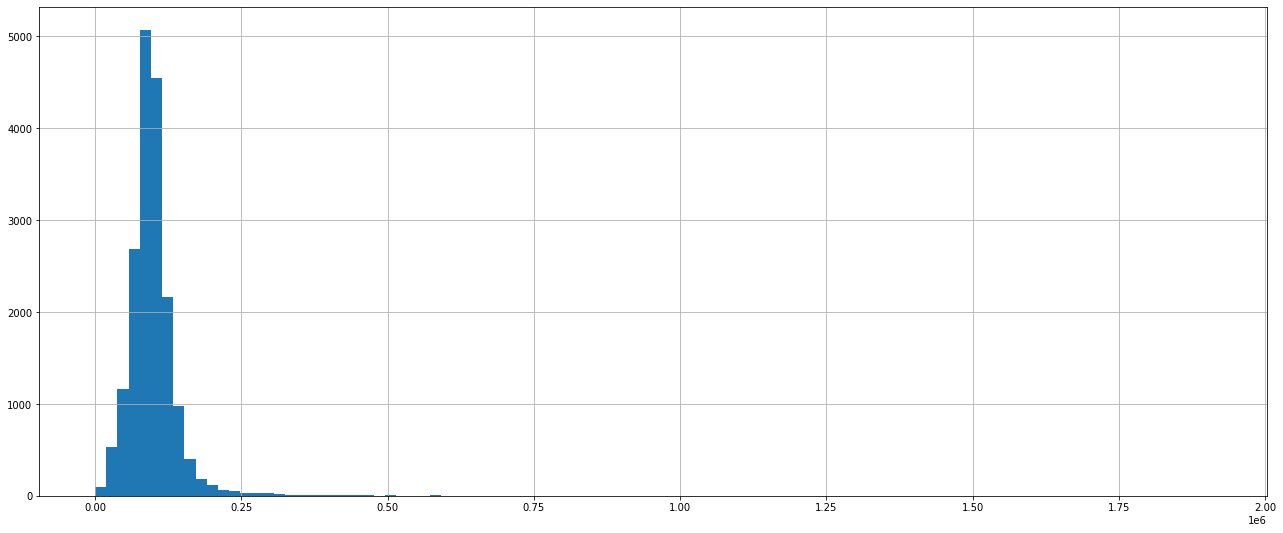

In [46]:
df['square_meter_price'].hist(bins=100,figsize = (22, 9))


**Вывод**: *цена квадратного метра может колебаться в районе 35000-210000 рублей.*

### Дистанция от центра.

(0.0, 10000.0)

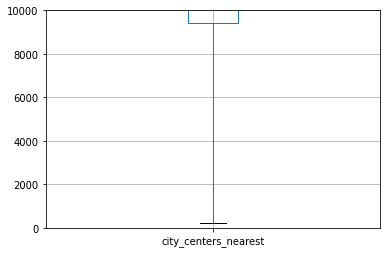

In [47]:
df.boxplot('city_centers_nearest')
plt.ylim(0,10000)


<AxesSubplot:>

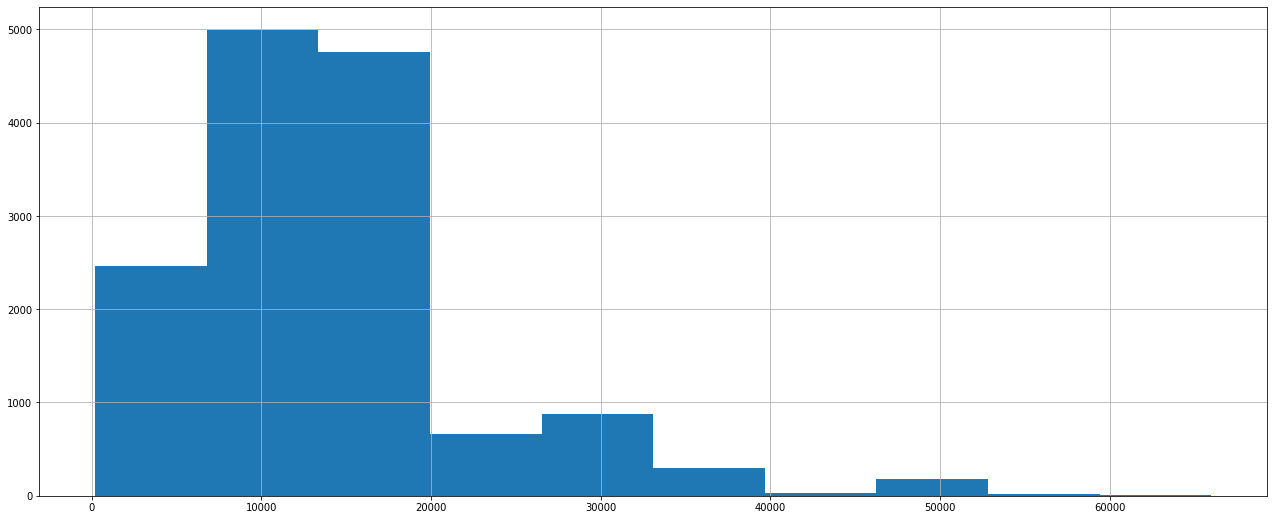

In [48]:
df['city_centers_nearest'].hist(figsize = (22, 9))


**Вывод**: *в среднем, объекты распологаются 600-6500 метров от центра города.*

## Исследование зависимостей

### Функция исследования зависимостей `convert_to_price`.

Напишем функцию, которая упростит процесс исследования. Функция будет конвертировать значения столбца в среднее значение цены.

In [49]:
# Функция convert_series_to_median_price_func() конвертирует любой столбец в формат square_meter_price для исследования зависимостей.
# Например, в среднюю цену для каждого этажа или средняя стоимость каждого месяца.
def convert_series_to_median_price_func(data,str_column):

    price_dict = dict(data.groupby(str_column)['square_meter_price'].median())
    price_column = []
    for item in data[str_column]:
        if item in price_dict:
            price_column.append(price_dict[item])
    return price_column


In [50]:
# Конвертирует столбец или столбцы в цену и объединяет в таблицу. 
def convert_to_price(data,columns_to_price):
    
    x = columns_to_price
    
    new_data = pd.DataFrame(convert_series_to_median_price_func(data,columns_to_price[0]))
    new_data.columns = [columns_to_price[0]]
   
    for i in range(len(x)):
        new_data[x[i]] = convert_series_to_median_price_func(data,x[i])
    
    return new_data


Количество полных значений в столбцах должно совпадать, без этого работать не будет. Т.е столбцы `airports_nearest` (14,259 non-null) и `city_centers_nearest` (14279 non-null) запустить с другими столбцами (18253 non-null) одновременно не получится. Или испозовать dropna() для таблицы.

In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18253 entries, 1 to 23697
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   last_price               18253 non-null  float64       
 1   total_area               18253 non-null  float64       
 2   first_day_exposition     18253 non-null  datetime64[ns]
 3   rooms                    18253 non-null  int64         
 4   ceiling_height           18253 non-null  float64       
 5   floors_total             18253 non-null  int64         
 6   living_area              18253 non-null  float64       
 7   floor                    18253 non-null  int64         
 8   is_apartment             18253 non-null  bool          
 9   studio                   18253 non-null  bool          
 10  open_plan                18253 non-null  bool          
 11  kitchen_area             18253 non-null  float64       
 12  balcony                  18253 n

### Стоимость квартиры

##### Зависимость цены от площади, числа комнат, удалённости центра, этажа, даты размещения.

In [52]:
search_for_matches = df[['square_meter_price','rooms','city_centers_nearest','residential-total_ratio','kitchen-total_ratio']].dropna()


In [53]:
search_for_matches


,square_meter_price,rooms,city_centers_nearest,residential-total_ratio,kitchen-total_ratio
1,82921.0,1,18603.0,0.470297,0.272277
2,92786.0,2,13933.0,0.607143,0.142857
3,408176.0,3,6800.0,0.591195,0.176101
4,100000.0,2,8098.0,0.320000,0.410000
6,99196.0,1,19143.0,0.294906,0.375335
...,...,...,...,...,...
23689,100567.0,1,16081.0,0.453258,0.254958
23690,105769.0,2,6263.0,0.596154,0.115385
23691,129904.0,2,4489.0,0.548697,0.150892
23693,73718.0,3,34104.0,0.641026,0.128205


square_meter_price         1.000000
kitchen-total_ratio        0.145376
rooms                      0.053811
residential-total_ratio   -0.139071
city_centers_nearest      -0.318045
Name: square_meter_price, dtype: float64

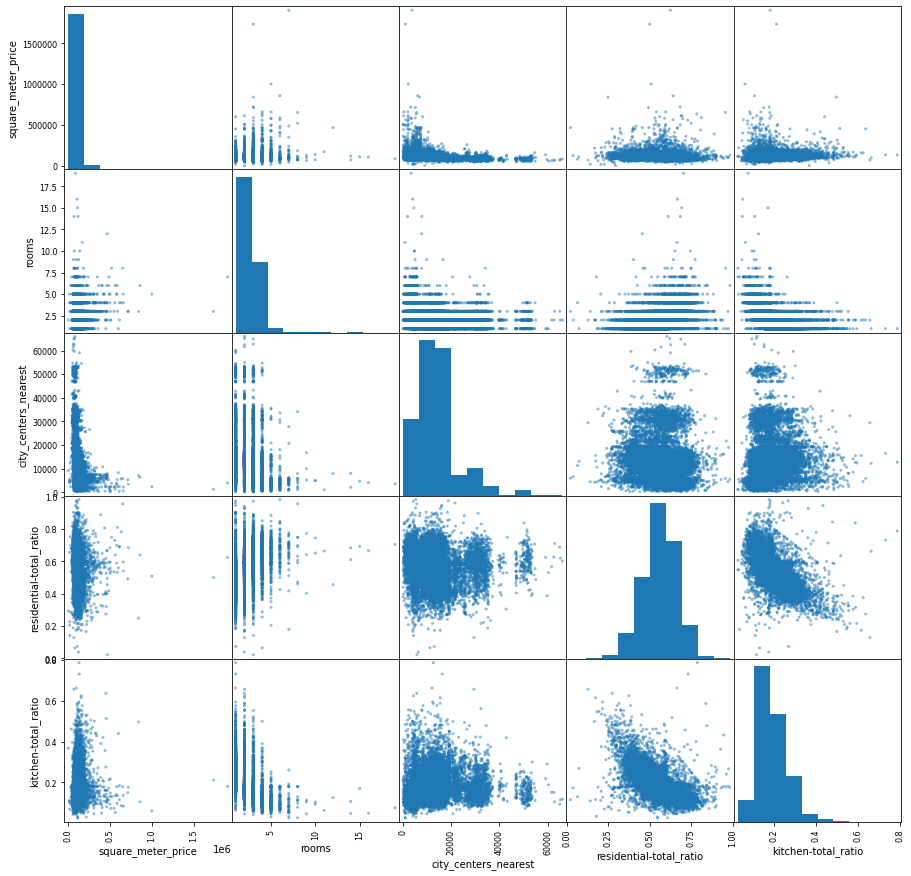

In [54]:
pd.plotting.scatter_matrix(search_for_matches, figsize=(15,15))
search_for_matches.corr()['square_meter_price'].sort_values(ascending=False)


**Вывод**: *больше всего на цену влияет количество комнат, а меньше всего дальность от цетра.*

##### Зависимость цены от площади.

<AxesSubplot:xlabel='residential-total_ratio', ylabel='square_meter_price'>

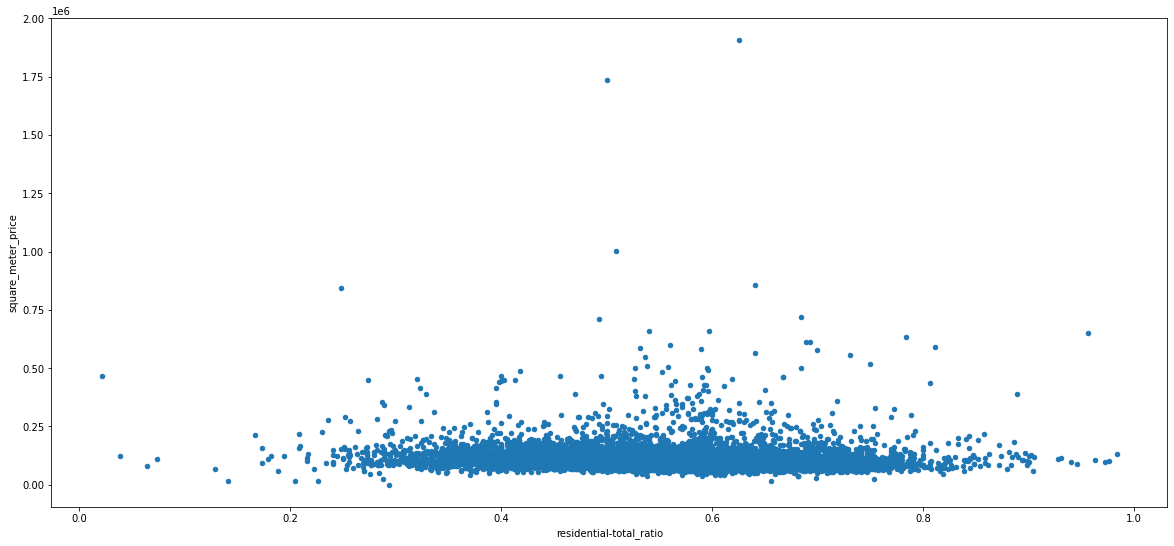

In [55]:
search_for_matches.plot(x='residential-total_ratio', y='square_meter_price', kind='scatter',figsize = (20, 9))


In [56]:
search_for_matches.groupby('residential-total_ratio')['square_meter_price'].median().sort_values()


residential-total_ratio
0.204604      15345.0
0.656092      15862.0
0.226316      16842.0
0.141304      17391.0
0.287500      26250.0
              ...    
0.956522     652174.0
0.540429     660000.0
0.248276     841379.0
0.640532     857543.0
0.508728    1000748.0
Name: square_meter_price, Length: 5019, dtype: float64

In [57]:
print('Min:',search_for_matches.groupby('residential-total_ratio')['square_meter_price'].median().min())
print('Max:',search_for_matches.groupby('residential-total_ratio')['square_meter_price'].median().max())


Min: 15345.0
Max: 1000748.0


**Вывод**: Цена выше при площади жилой зоны - 50%. Цена выше при площади жилой зоны - 20%.

<AxesSubplot:xlabel='kitchen-total_ratio', ylabel='square_meter_price'>

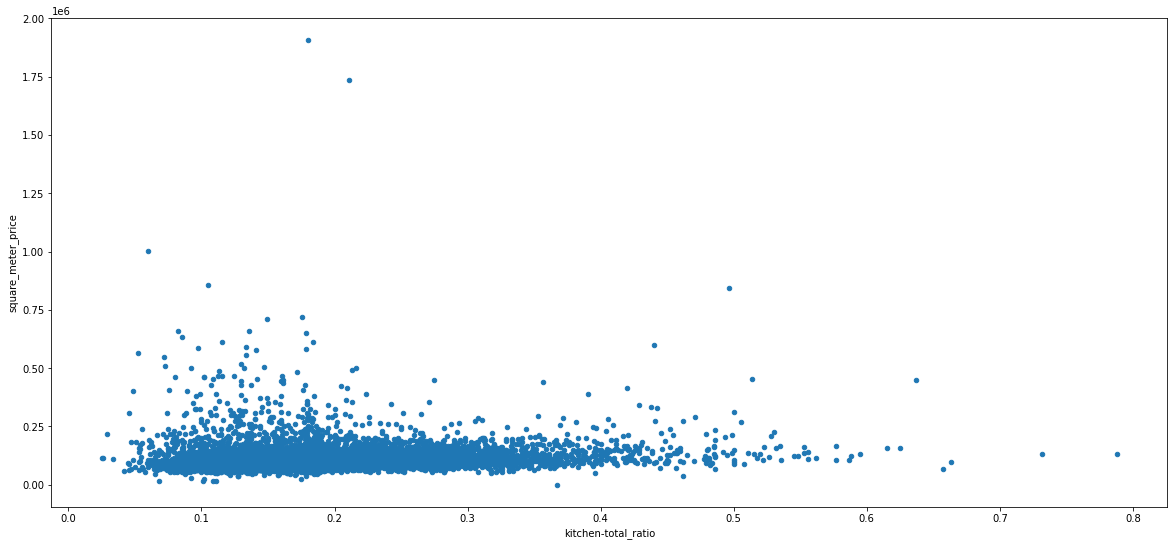

In [58]:
search_for_matches.plot(x='kitchen-total_ratio', y='square_meter_price', kind='scatter',figsize = (20, 9))


In [59]:
search_for_matches.groupby('kitchen-total_ratio')['square_meter_price'].median().sort_values()


kitchen-total_ratio
0.366972        112.0
0.110827      15345.0
0.100937      15862.0
0.068421      16842.0
0.101833      24440.0
              ...    
0.178261     652174.0
0.082508     660000.0
0.496552     841379.0
0.105005     857543.0
0.059850    1000748.0
Name: square_meter_price, Length: 4260, dtype: float64

In [60]:
print('Min:',search_for_matches.groupby('kitchen-total_ratio')['square_meter_price'].median().min())
print('Max:',search_for_matches.groupby('kitchen-total_ratio')['square_meter_price'].median().max())


Min: 112.0
Max: 1000748.0


**Вывод**: *Цена выше при соотношении кухни/о.п - 5%. Цена выше при соотношении кухни/о.п - 40%.*

##### Зависимость цены от числа комнат.

<AxesSubplot:xlabel='rooms', ylabel='square_meter_price'>

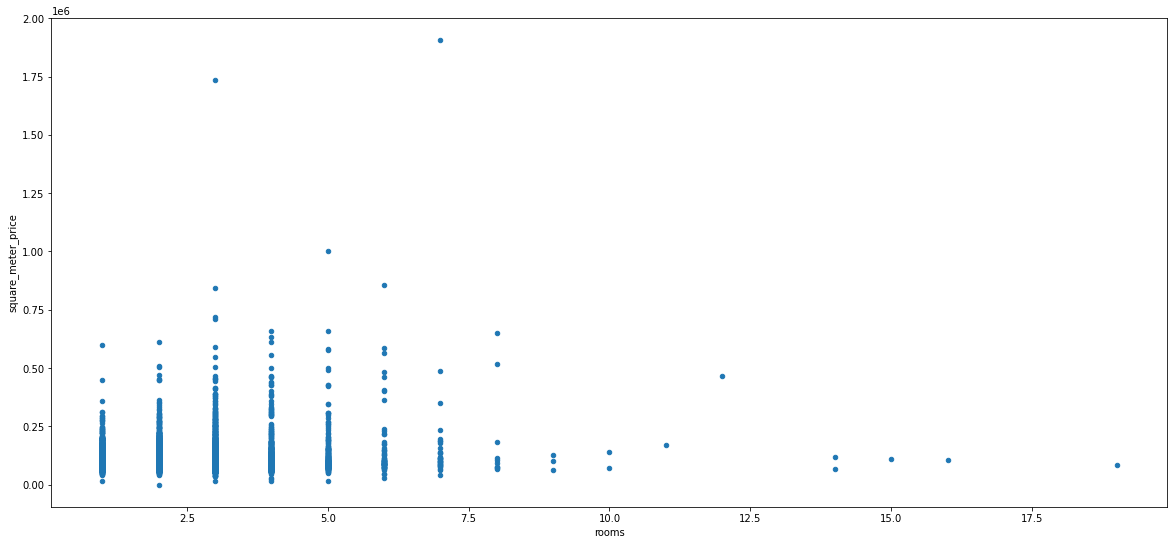

In [61]:
search_for_matches.plot(x='rooms', y='square_meter_price', kind='scatter',figsize = (20, 9))


In [62]:
search_for_matches.groupby('rooms')['square_meter_price'].median()


rooms
1     106061.0
2      99100.0
3      93045.0
4      94392.0
5      99732.5
6      99254.0
7     109996.0
8     100407.0
9      99247.0
10    104828.5
11    170015.0
12    466667.0
14     92828.0
15    110169.0
16    105556.0
19     86092.0
Name: square_meter_price, dtype: float64

**Вывод**: *Самая высокая цена - 11 комнат, низкая - 8 комнат.*

##### Зависимость цены от удалённости центра.

<AxesSubplot:xlabel='city_centers_nearest', ylabel='square_meter_price'>

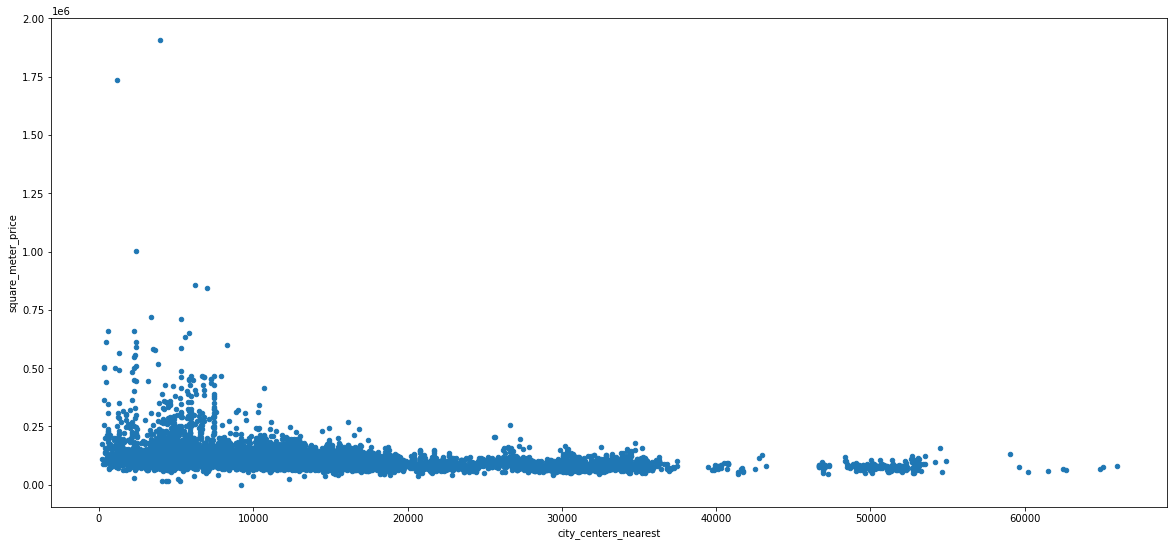

In [63]:
search_for_matches.plot(x='city_centers_nearest', y='square_meter_price', kind='scatter',figsize = (20, 9))


**Вывод**: *Дроже всего цены до 7 км от центра.*

##### Зависимость цены от этажа.

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

In [64]:
group_of_floor_group = df.groupby('floor_group')['square_meter_price'].median()
group_of_floor_group.columns = ['price']
group_of_floor_group


floor_group
другой       97059.0
первый       80900.0
последний    88172.0
Name: square_meter_price, dtype: float64

<AxesSubplot:ylabel='square_meter_price'>

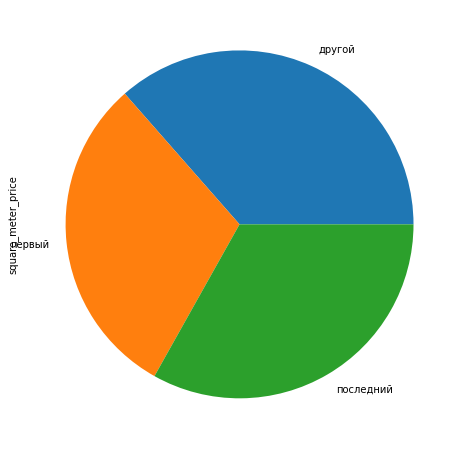

In [65]:
group_of_floor_group.plot(y='price', kind='pie', figsize=(8,8))


In [66]:
df.query('floor_group in "другой"').groupby('floor')['square_meter_price'].median()


floor
2      91537.0
3      93155.5
4      92479.5
5      97826.0
6      97561.0
7      98270.0
8      99088.0
9     102273.0
10    104863.0
11    101875.0
12    105000.0
13    102564.0
14    101538.5
15    104294.0
16    105995.0
17    102893.5
18    103784.5
19    105613.0
20    104812.5
21    108159.5
22    102890.0
23    107457.5
24    102098.0
25     95625.0
26     87455.0
27    102319.0
28    110926.0
31    105556.0
32     98020.0
Name: square_meter_price, dtype: float64

**Вывод**: *Первый и последний этажи не пользуются спросом. Цены на другие этажи выше.*

##### Зависимость от даты размещения.

Исследуем зависимость от даты размещения: дня недели, месяца и года.

In [67]:
ex = df[['square_meter_price','day_exposition','weekday_exposition','month_exposition','year_exposition']].corr()['square_meter_price']
ex


square_meter_price    1.000000
day_exposition        0.011084
weekday_exposition   -0.004712
month_exposition      0.000330
year_exposition      -0.006035
Name: square_meter_price, dtype: float64

Высокая корреляция даты размещения и цены. Нужно изучить подробнее.

Зависимость от года размещения.

In [68]:
df.groupby('year_exposition')['square_meter_price'].median().sort_values()


year_exposition
2016     91566.5
2017     92308.0
2015     92697.0
2018     95563.0
2019    103995.0
2014    104851.5
Name: square_meter_price, dtype: float64

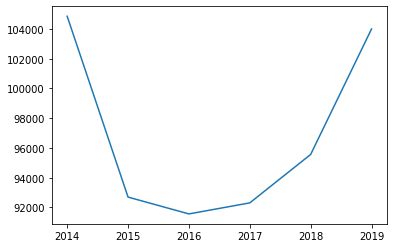

In [69]:
plt.plot([2014,2015,2016,2017,2018,2019],df.groupby('year_exposition')['square_meter_price'].median())
plt.show()


**Вывод**: *Самый дорогой год - 2014. Самый дешевый год - 2016.*

Зависимость от месяца размещения.

In [70]:
df.groupby('month_exposition')['square_meter_price'].median().sort_values()


month_exposition
4     92391.0
6     92949.0
3     93027.0
12    93250.0
5     93300.0
7     93750.0
10    94093.0
11    94444.0
2     94510.0
1     95238.0
8     95341.0
9     95350.5
Name: square_meter_price, dtype: float64

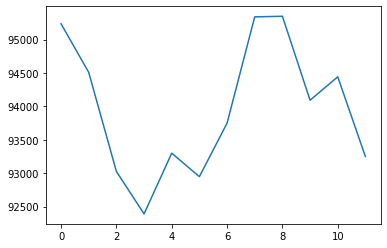

In [71]:
plt.plot(np.arange(12),df.groupby('month_exposition')['square_meter_price'].median())
plt.show()


**Вывод**: В сентябре дорого. В марте дешево. 

Зависимость от недели размещения.

In [72]:
df[['square_meter_price','day_exposition','weekday_exposition','month_exposition','year_exposition']].head(1)


,square_meter_price,day_exposition,weekday_exposition,month_exposition,year_exposition
1,82921.0,4,1,12,2018


*Пояснение: нулевой день недели это понедельник.*

In [73]:
df.groupby('weekday_exposition')['square_meter_price'].median()


weekday_exposition
0    94233.0
1    94444.0
2    94616.0
3    94444.0
4    93562.5
5    92857.0
6    93137.5
Name: square_meter_price, dtype: float64

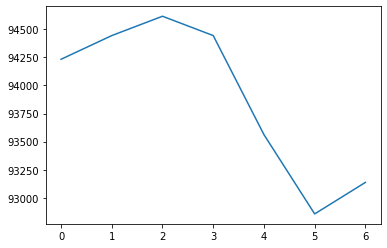

In [74]:
plt.plot(np.arange(7),df.groupby('weekday_exposition')['square_meter_price'].median())
plt.show()


**Вывод**: Дорого - среда. Дешево - суббота.

Зависимость от дня размещения.

In [75]:
df.groupby('day_exposition')['square_meter_price'].median().sort_values()


day_exposition
25    89770.0
31    90254.0
28    91954.0
5     92121.0
3     92365.0
13    92593.0
23    92857.0
17    93038.5
7     93156.0
2     93212.5
1     93243.0
22    93301.0
16    93626.0
6     93777.5
19    94250.0
26    94262.0
4     94281.0
14    94302.0
11    94507.0
30    94706.0
27    94720.0
18    94794.0
9     94813.5
20    95238.0
24    95289.0
10    95550.0
21    95581.0
15    95638.0
8     95703.0
12    96385.0
29    97414.0
Name: square_meter_price, dtype: float64

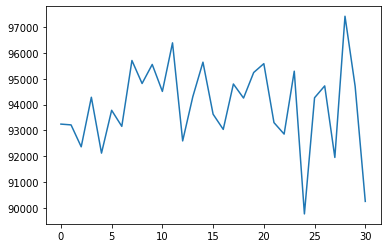

In [76]:
plt.plot(np.arange(31),df.groupby('day_exposition')['square_meter_price'].median())
plt.show()


**Вывод**: *Самый дорогой день 29. Самый дешевый день 25.*

### 10 населённых пунктов с наибольшим числом объявлений.

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра `square_meter_price` в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`.

In [77]:
cities = ['г. Бокситогорск', 'г. Волосово', 'г. Волхов', 'г. Всеволожск',
       'г. Выборг', 'г. Высоцк', 'г. Гатчина', 'г. Зеленогорск',
       'г. Ивангород', 'г. Каменногорск', 'г. Кингисепп', 'г. Кириши',
       'г. Кировск', 'г. Колпино', 'г. Коммунар', 'г. Красное Село',
       'г. Кронштадт', 'г. Кудрово', 'г. Лодейное Поле', 'г. Ломоносов',
       'г. Луга', 'г. Любань', 'г. Мурино', 'г. Никольское',
       'г. Новая Ладога', 'г. Отрадное', 'г. Павловск', 'г. Петергоф',
       'г. Пикалёво', 'г. Подпорожье', 'г. Приморск', 'г. Приозерск',
       'г. Пушкин', 'г. Санкт-Петербург', 'г. Светогорск', 'г. Сертолово',
       'г. Сестрорецк', 'г. Сланцы', 'г. Сосновый Бор', 'г. Сясьстрой',
       'г. Тихвин', 'г. Тосно', 'г. Шлиссельбург']

df = df.query('locality_name in @cities')


In [78]:
large_locations = df.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count','mean'])
large_locations.columns = ['locality','square_meter_price']
large_locations = large_locations.sort_values('locality', ascending=False).head(10)
display(large_locations)


,locality,square_meter_price
locality_name,,
г. Санкт-Петербург,12327,112279.865417
г. Всеволожск,302,68545.033113
г. Пушкин,283,102690.646643
г. Колпино,273,75145.095238
г. Гатчина,241,67323.232365
г. Выборг,178,56983.044944
г. Петергоф,161,83212.534161
г. Красное Село,149,72005.711409
г. Сестрорецк,143,100050.111888


**Вывод**: *меньше всего объявлений в Кудрово, а больше всего в СПб.*

In [115]:
#Код ревьюера
df.groupby('locality_name')['square_meter_price']\
    .agg(['count','mean']).sort_values(by = 'count', ascending = False).head(10)


,count,mean
locality_name,,
г. Санкт-Петербург,12327,112279.865417
г. Всеволожск,302,68545.033113
г. Пушкин,283,102690.646643
г. Колпино,273,75145.095238
г. Гатчина,241,67323.232365
г. Выборг,178,56983.044944
г. Петергоф,161,83212.534161
г. Красное Село,149,72005.711409
г. Сестрорецк,143,100050.111888


### Квартиры в Санкт-Петербурге

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге `locality_name`. Выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах `km_centers_nearest`: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

In [79]:
df['km_centers_nearest'] = df['city_centers_nearest'].apply(lambda x: x/1000).round()


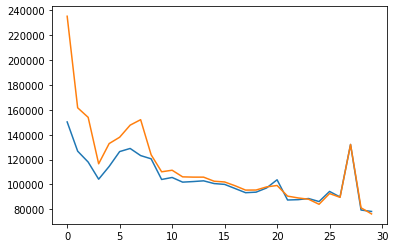

In [80]:
#https://pythonru.com/biblioteki/tipy-grafikov-v-matplotlib-plt3 моя шпаргалка
price = df.query('locality_name in "г. Санкт-Петербург"').groupby('km_centers_nearest')['square_meter_price'].agg(['median', 'mean'])
km = np.arange(len(price))
plt.plot(km, price)
plt.show()


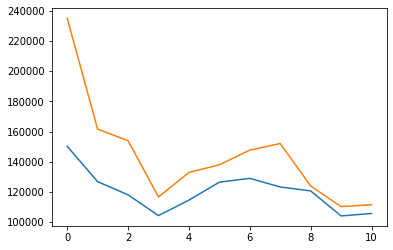

In [81]:
plt.plot(np.arange(11), price.loc[0:10])
plt.show()


**Вывод**: *на графике видны два аномальных пика роста цены 7 и 27 км. Полагаю, это новые районы. Вероятно в 7 километрах расположен престижный офисный или жилой район, а в 27 км - пром.зона. Отбросим аномальные скачки роста. Резкое падение цены идет от 0 км до 3 км, после чего падение идет более плавно - скорее всего это и есть граница центра.*

*Определим границы центра - 3 км.*

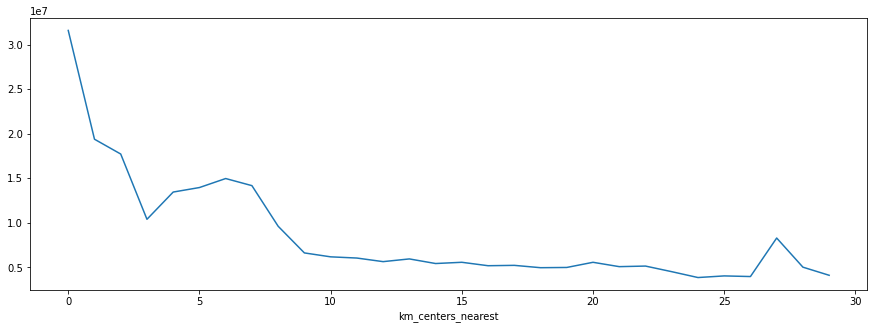

In [127]:
df.query('locality_name in "г. Санкт-Петербург"').groupby('km_centers_nearest')['last_price'].mean()\
    .plot(figsize = (15, 5))
plt.show()


#### Квартиры в центре Санкт-Петербурга

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь `residential-total_ratio` и `kitchen-total_ratio`, цена `square_meter_price`, число комнат `rooms`, высота потолков `ceiling_height`. Также выделим факторы, которые влияют на стоимость квартиры (число комнат `rooms`, этаж `floor_group`, удалённость от центра `city_centers_nearest`, дата размещения объявления `days_exposition`).

In [82]:
spb_center_only = df.query('locality_name in "г. Санкт-Петербург" and km_centers_nearest <= 3')
spb_object = spb_center_only[['rooms','ceiling_height','square_meter_price','residential-total_ratio','kitchen-total_ratio']]
spb_object


,rooms,ceiling_height,square_meter_price,residential-total_ratio,kitchen-total_ratio
24,2,2.65,66872.0,0.473251,0.205761
99,4,2.65,106667.0,0.744444,0.088889
138,2,2.65,120000.0,0.725000,0.150000
154,3,4.15,102500.0,0.550000,0.150000
155,4,3.50,302839.0,0.577287,0.179811
...,...,...,...,...,...
23400,7,3.40,140845.0,0.708920,0.145540
23430,1,3.30,138421.0,0.421053,0.315789
23449,3,3.25,119772.0,0.570342,0.171103
23602,3,2.65,119178.0,0.589041,0.178082


square_meter_price         1.000000
residential-total_ratio    0.890285
kitchen-total_ratio        0.764024
ceiling_height             0.325499
rooms                     -0.001574
Name: square_meter_price, dtype: float64

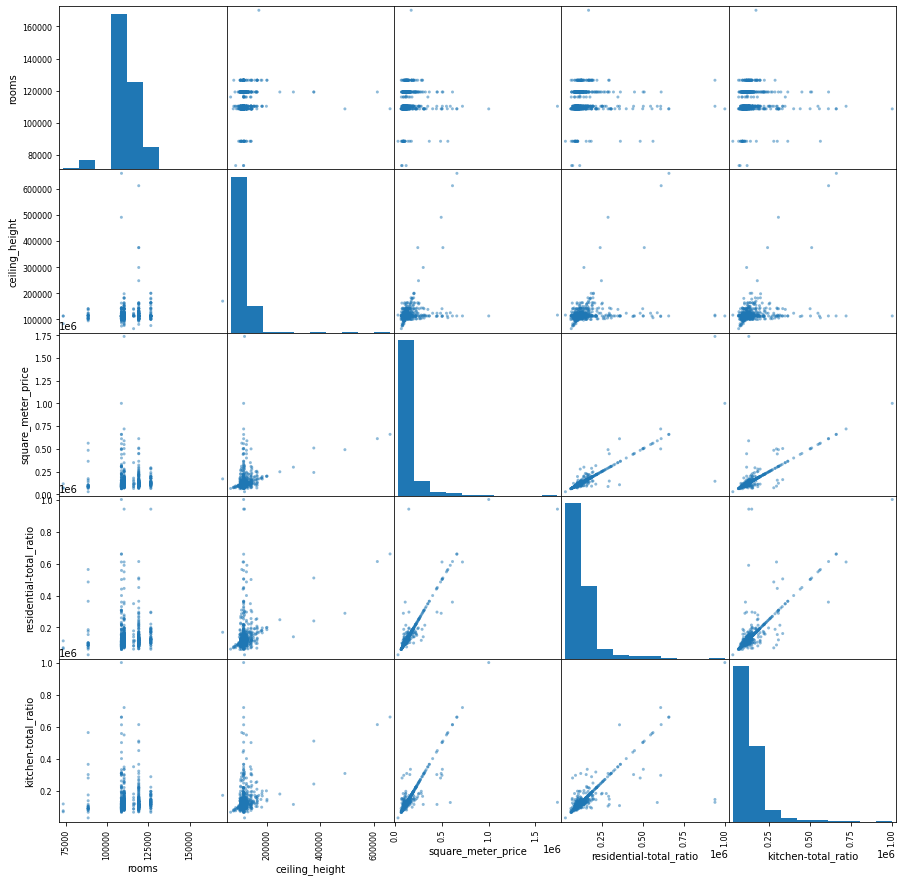

In [83]:
spb_object = spb_object.dropna()
spb_object_to_price = convert_to_price(spb_object,['rooms','ceiling_height','square_meter_price','residential-total_ratio','kitchen-total_ratio'])
pd.plotting.scatter_matrix(spb_object_to_price, figsize=(15,15))
spb_object_to_price.corr()['square_meter_price'].sort_values(ascending=False)


##### Квартиры всей базы.

In [84]:
all_locations = df.dropna()
all_locations_obj = convert_to_price(all_locations,['rooms','ceiling_height','square_meter_price','residential-total_ratio','kitchen-total_ratio'])
all_locations


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,days_exposition,square_meter_price,day_exposition,weekday_exposition,month_exposition,year_exposition,floor_group,residential-total_ratio,kitchen-total_ratio,km_centers_nearest
2,5196000.0,56.00,2015-08-20,2,2.65,5,34.0,4,False,False,...,558,92786.0,20,3,8,2015,другой,0.607143,0.142857,14.0
3,64900000.0,159.00,2015-07-24,3,2.65,14,94.0,9,False,False,...,424,408176.0,24,4,7,2015,другой,0.591195,0.176101,7.0
4,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,...,121,100000.0,19,1,6,2018,другой,0.320000,0.410000,8.0
9,5400000.0,61.00,2017-02-26,3,2.50,9,44.0,7,False,False,...,289,88525.0,26,6,2,2017,другой,0.721311,0.098361,15.0
10,5050000.0,39.60,2017-11-16,1,2.67,12,20.0,3,False,False,...,137,127525.0,16,3,11,2017,другой,0.505051,0.202020,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,3550000.0,35.30,2018-02-28,1,2.86,15,16.0,4,False,False,...,29,100567.0,28,2,2,2018,другой,0.453258,0.254958,16.0
23690,5500000.0,52.00,2018-07-19,2,2.65,5,31.0,2,False,False,...,15,105769.0,19,3,7,2018,другой,0.596154,0.115385,6.0
23691,9470000.0,72.90,2016-10-13,2,2.75,25,40.0,7,False,False,...,519,129904.0,13,3,10,2016,другой,0.548697,0.150892,4.0
23693,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,False,...,239,73718.0,5,4,8,2016,другой,0.641026,0.128205,34.0


square_meter_price         1.000000
residential-total_ratio    0.687746
kitchen-total_ratio        0.648402
ceiling_height             0.315108
rooms                      0.067310
Name: square_meter_price, dtype: float64

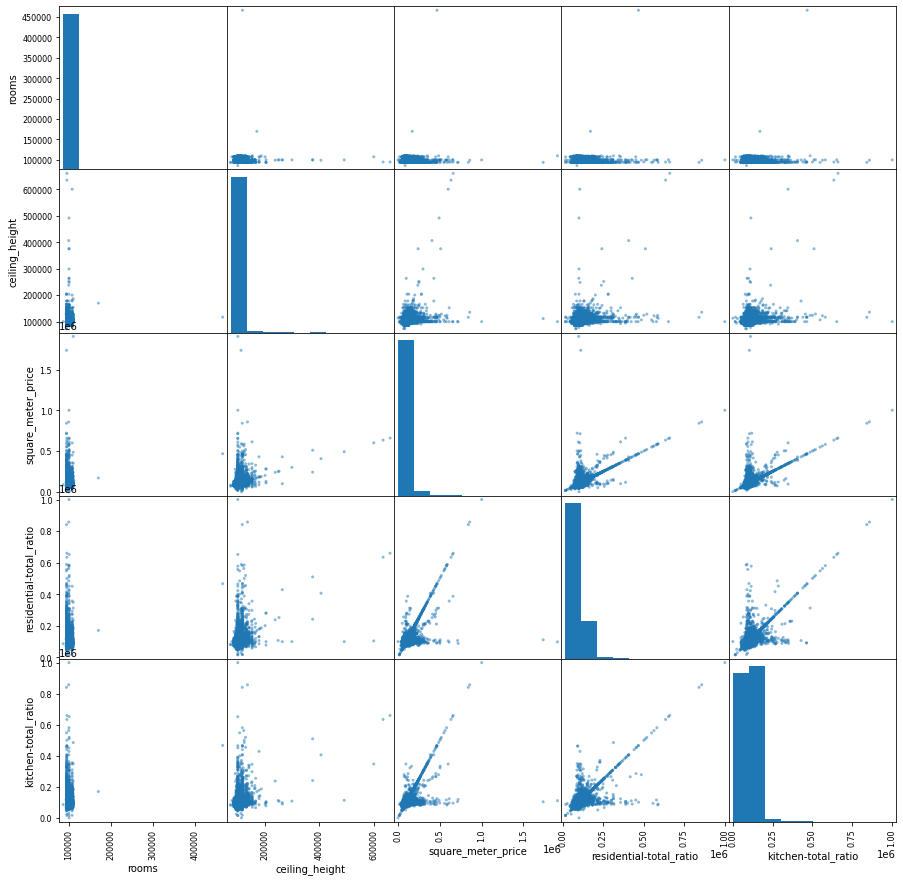

In [85]:
pd.plotting.scatter_matrix(all_locations_obj, figsize=(15,15))
all_locations_obj.corr()['square_meter_price'].sort_values(ascending=False)


##### Поиск зависимостей.

**Зависимость числа комнат**

In [86]:
spb_object.groupby('rooms')['square_meter_price'].median().sort_values()


rooms
8      73469.0
6      88581.0
5     108696.0
4     108762.5
3     110345.5
7     116081.0
14    116785.0
2     119201.0
1     126522.0
11    170015.0
Name: square_meter_price, dtype: float64

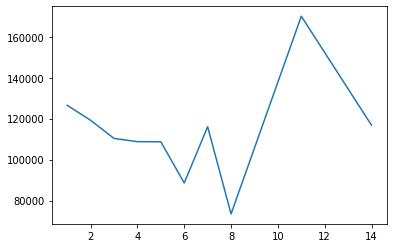

In [87]:
plt.plot([1,2,3,4,5,6,7,8,11,14],spb_object.groupby('rooms')['square_meter_price'].median())
plt.show()


**Вывод**: *Дороже всего - 11 комнат. Дешевле всего - 8 комнат.*

**Зависимость высоты потолков**

In [88]:
spb_object.groupby('ceiling_height')['square_meter_price'].median().sort_values()


ceiling_height
3.32     64516.0
3.24     74362.0
2.82     76311.0
2.93     80430.0
3.49     80863.0
          ...   
4.80    299000.0
3.53    375213.0
4.90    491447.0
4.10    612557.0
3.85    660000.0
Name: square_meter_price, Length: 92, dtype: float64

In [89]:
print('Min:',spb_object.groupby('ceiling_height')['square_meter_price'].median().min())
print('Max:',spb_object.groupby('ceiling_height')['square_meter_price'].median().max())


Min: 64516.0
Max: 660000.0


**Вывод**: *Потолки 3.85 метра - дорого. Потолки 3.32 метра - дешево.*

**Зависимость жилой зоны**

In [90]:
spb_object.groupby('residential-total_ratio')['square_meter_price'].median().sort_values()


residential-total_ratio
0.698287      28920.0
0.556478      62126.0
0.506410      62179.0
0.730717      62923.0
0.594262      63525.0
              ...    
0.689127     612557.0
0.596708     658436.0
0.540429     660000.0
0.500000     940504.5
0.508728    1000748.0
Name: square_meter_price, Length: 557, dtype: float64

In [91]:
print('Min:',spb_object.groupby('residential-total_ratio')['square_meter_price'].median().min())
print('Max:',spb_object.groupby('residential-total_ratio')['square_meter_price'].median().max())


Min: 28920.0
Max: 1000748.0


**Вывод**: *Цена выше при соотношении жилой зоны - 50%. Цена ниже при соотношении жилой зоны - 70%.* 

**Зависимость кухни**

In [92]:
spb_object.groupby('kitchen-total_ratio')['square_meter_price'].median().sort_values()


kitchen-total_ratio
0.092227      28920.0
0.074425      62923.0
0.245902      63525.0
0.126374      64286.0
0.100806      64516.0
              ...    
0.183767     612557.0
0.135802     658436.0
0.082508     660000.0
0.175439     719298.0
0.059850    1000748.0
Name: square_meter_price, Length: 523, dtype: float64

In [93]:
print('Min:',spb_object.groupby('kitchen-total_ratio')['square_meter_price'].median().min())
print('Max:',spb_object.groupby('kitchen-total_ratio')['square_meter_price'].median().max())


Min: 28920.0
Max: 1000748.0


**Вывод**: *Цена выше при соотношении кухни - 5%. Цена ниже при соотношении кухни - 10%.*

In [94]:
second_relationship_theory = spb_center_only[['locality_name','city_centers_nearest','square_meter_price', 'day_exposition',
       'weekday_exposition', 'month_exposition', 'year_exposition',
       'floor_group']]
second_relationship_theory


,locality_name,city_centers_nearest,square_meter_price,day_exposition,weekday_exposition,month_exposition,year_exposition,floor_group
24,г. Санкт-Петербург,2336.0,66872.0,31,5,10,2015,первый
99,г. Санкт-Петербург,2818.0,106667.0,26,1,9,2017,другой
138,г. Санкт-Петербург,2913.0,120000.0,18,5,11,2017,другой
154,г. Санкт-Петербург,3167.0,102500.0,6,1,11,2018,другой
155,г. Санкт-Петербург,1771.0,302839.0,7,4,7,2017,последний
...,...,...,...,...,...,...,...,...
23400,г. Санкт-Петербург,1225.0,140845.0,28,3,9,2017,последний
23430,г. Санкт-Петербург,3441.0,138421.0,6,1,11,2018,первый
23449,г. Санкт-Петербург,3400.0,119772.0,28,3,5,2015,другой
23602,г. Санкт-Петербург,2345.0,119178.0,23,2,1,2019,последний


square_meter_price      1.000000
city_centers_nearest    0.936023
year_exposition         0.142437
floor_group             0.117427
day_exposition          0.028632
month_exposition        0.015886
weekday_exposition      0.010673
Name: square_meter_price, dtype: float64

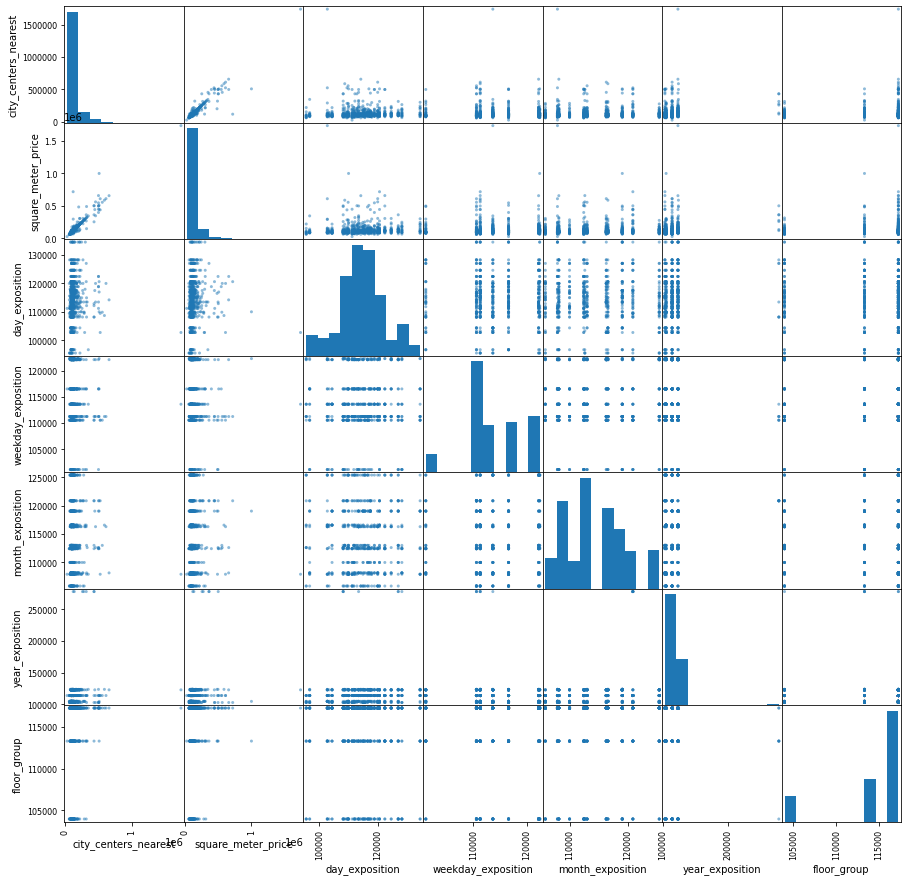

In [95]:
second_relationship_theory = second_relationship_theory.dropna()
second_relationship_theory_to_price = convert_to_price(second_relationship_theory,['city_centers_nearest','square_meter_price', 'day_exposition',
       'weekday_exposition', 'month_exposition', 'year_exposition',
       'floor_group'])
pd.plotting.scatter_matrix(second_relationship_theory_to_price, figsize=(15,15))
second_relationship_theory_to_price.corr()['square_meter_price'].sort_values(ascending=False)


##### Общие данные

In [96]:
all_locations_second_relationship_theory = all_locations[['locality_name','city_centers_nearest','square_meter_price', 'day_exposition',
       'weekday_exposition', 'month_exposition', 'year_exposition',
       'floor_group']]
all_locations_second_relationship_theory


,locality_name,city_centers_nearest,square_meter_price,day_exposition,weekday_exposition,month_exposition,year_exposition,floor_group
2,г. Санкт-Петербург,13933.0,92786.0,20,3,8,2015,другой
3,г. Санкт-Петербург,6800.0,408176.0,24,4,7,2015,другой
4,г. Санкт-Петербург,8098.0,100000.0,19,1,6,2018,другой
9,г. Санкт-Петербург,15008.0,88525.0,26,6,2,2017,другой
10,г. Санкт-Петербург,13878.0,127525.0,16,3,11,2017,другой
...,...,...,...,...,...,...,...,...
23689,г. Санкт-Петербург,16081.0,100567.0,28,2,2,2018,другой
23690,г. Санкт-Петербург,6263.0,105769.0,19,3,7,2018,другой
23691,г. Санкт-Петербург,4489.0,129904.0,13,3,10,2016,другой
23693,г. Петергоф,34104.0,73718.0,5,4,8,2016,другой


square_meter_price      1.000000
city_centers_nearest    0.936023
year_exposition         0.142437
floor_group             0.117427
day_exposition          0.028632
month_exposition        0.015886
weekday_exposition      0.010673
Name: square_meter_price, dtype: float64

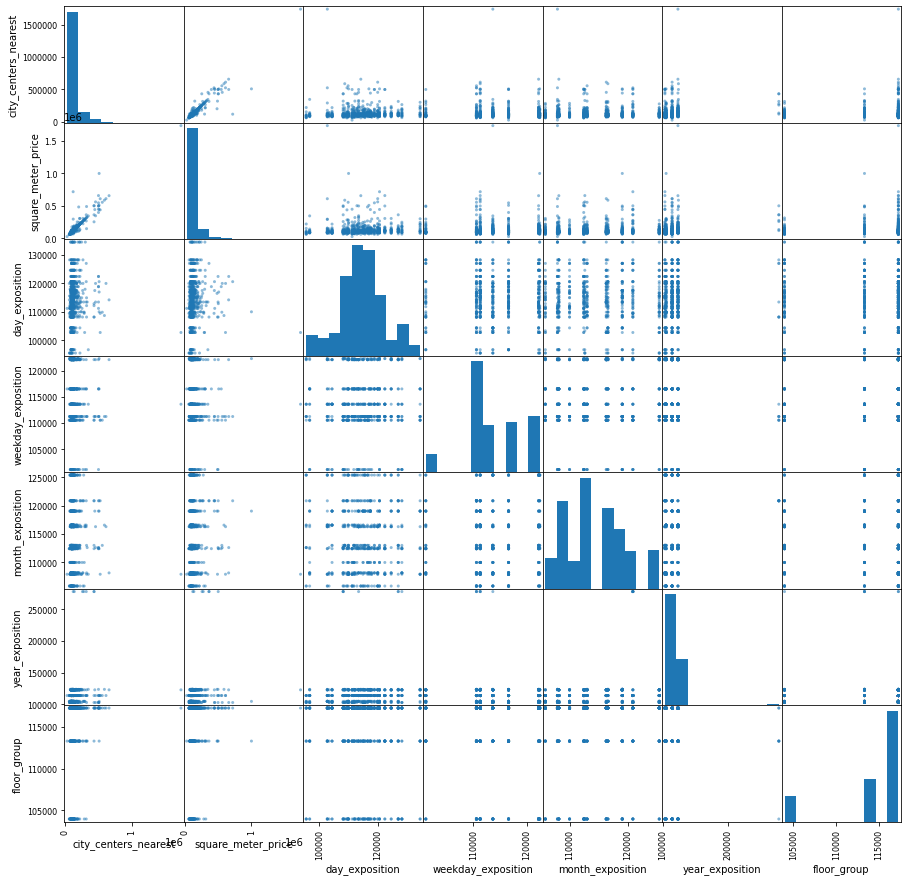

In [97]:
all_locations_second_relationship_theory = second_relationship_theory.dropna()
all_locations_second_relationship_theory_to_price = convert_to_price(all_locations_second_relationship_theory,['city_centers_nearest','square_meter_price', 'day_exposition',
       'weekday_exposition', 'month_exposition', 'year_exposition',
       'floor_group'])
pd.plotting.scatter_matrix(all_locations_second_relationship_theory_to_price, figsize=(15,15))
all_locations_second_relationship_theory_to_price.corr()['square_meter_price'].sort_values(ascending=False)


##### Поиск зависимостей.

**Зависимость цены от этажа**

In [98]:
spb_center_only.groupby('floor_group')['square_meter_price'].median()


floor_group
другой       117245.0
первый       103971.5
последний    113293.0
Name: square_meter_price, dtype: float64

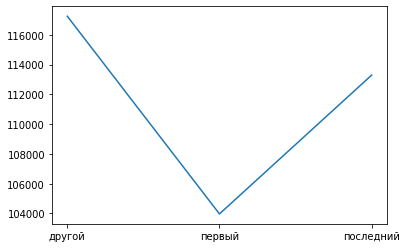

In [99]:
plt.plot(['другой','первый','последний'],spb_center_only.groupby('floor_group')['square_meter_price'].median())
plt.show()


**Вывод**: *другой - самый дорогой. Первый - самый дешевый.*

**Зависимость цены от даты**

In [100]:
spb_ex = spb_center_only[['city_centers_nearest','square_meter_price','day_exposition','weekday_exposition','month_exposition','year_exposition']]
spb_ex.corr()['square_meter_price'].sort_values(ascending=False)


square_meter_price      1.000000
month_exposition        0.013653
year_exposition         0.007142
weekday_exposition     -0.017988
day_exposition         -0.030133
city_centers_nearest   -0.173984
Name: square_meter_price, dtype: float64

**Год**

In [101]:
spb_ex.groupby('year_exposition')['square_meter_price'].median().sort_values()


year_exposition
2015    102810.0
2016    104603.0
2017    113848.0
2018    122826.0
2019    123584.0
2014    278100.0
Name: square_meter_price, dtype: float64

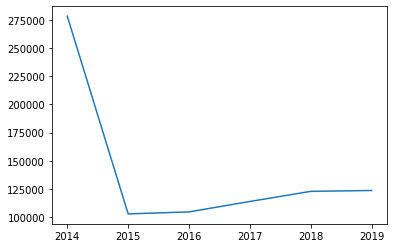

In [102]:
plt.plot([2014,2015,2016,2017,2018,2019],spb_ex.groupby('year_exposition')['square_meter_price'].median())
plt.show()


**Вывод**: *Самый дорогой год - 2014. Самый дешевый год - 2015.*

**Месяц**

In [103]:
spb_ex.groupby('month_exposition')['square_meter_price'].median().sort_values()


month_exposition
5     105853.0
4     107926.5
11    108163.0
6     110000.0
9     112431.0
8     112620.0
1     113008.0
7     116302.0
3     116574.5
2     119044.0
12    120857.5
10    125382.0
Name: square_meter_price, dtype: float64

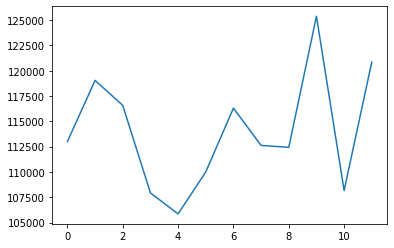

In [104]:
plt.plot(np.arange(12),spb_ex.groupby('month_exposition')['square_meter_price'].median())
plt.show()


**Вывод**: *самый дорогой месяц - Сентрябть, самый дешевый - Апрель.*

**Неделя**

In [105]:
spb_ex.groupby('weekday_exposition')['square_meter_price'].median().sort_values()


weekday_exposition
6    101099.0
1    110569.0
3    111274.0
2    113632.0
4    116568.0
0    122185.0
5    122386.0
Name: square_meter_price, dtype: float64

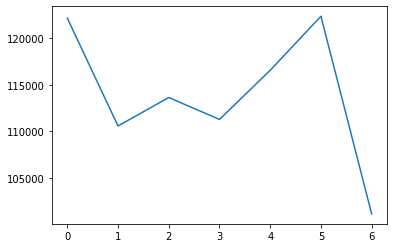

In [106]:
plt.plot(np.arange(7),spb_ex.groupby('weekday_exposition')['square_meter_price'].median())
plt.show()


**Вывод**: *самый дорогой день - суббота. Самый дешевый день - воскресенье.*

**День**

In [107]:
spb_ex.groupby('day_exposition')['square_meter_price'].median().sort_values()


day_exposition
31     95489.0
3      96667.0
4     102726.0
30    103322.0
14    104348.0
9     108163.0
21    108696.0
5     109465.5
24    109864.5
20    110011.5
28    111215.5
23    111799.5
15    112182.0
25    112879.0
10    113451.5
12    114210.0
16    114944.5
22    115035.0
19    115603.0
26    116500.0
8     116981.0
1     117500.0
6     117949.0
29    118868.0
13    120000.0
17    120625.5
27    122449.0
2     124630.5
11    127049.0
18    128295.5
7     134543.0
Name: square_meter_price, dtype: float64

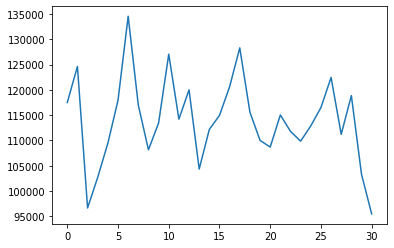

In [108]:
plt.plot(np.arange(31),spb_ex.groupby('day_exposition')['square_meter_price'].median())
plt.show()


**Вывод**: *7 день месяца сымый дорогой. 2 день месяца сымый дешевый.*

**Зависимость цены от центра города**

<AxesSubplot:xlabel='city_centers_nearest', ylabel='square_meter_price'>

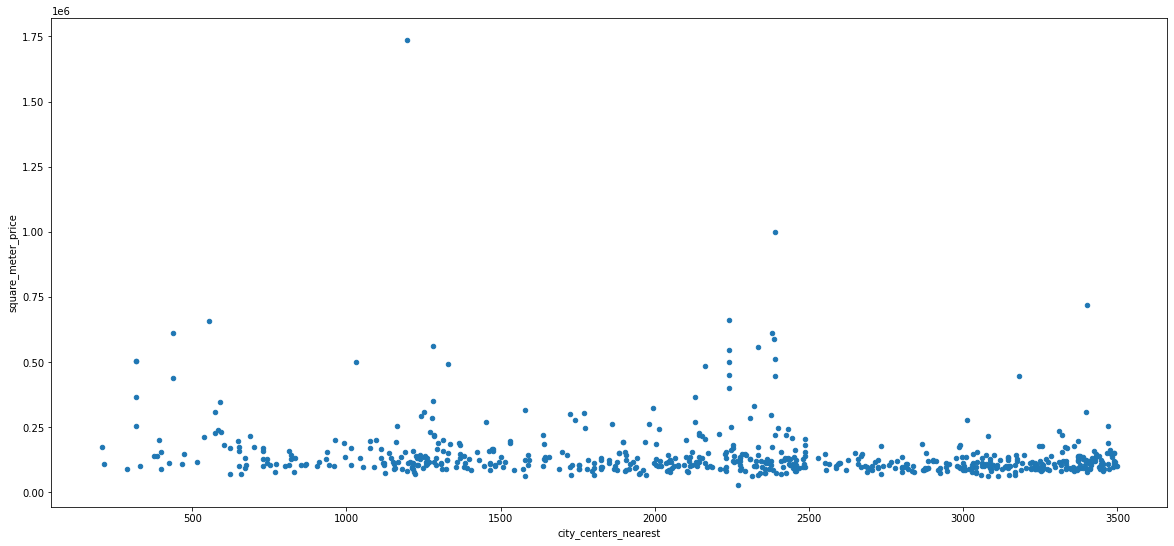

In [109]:
spb_ex.plot(x='city_centers_nearest', y='square_meter_price', kind='scatter',figsize = (20, 9))


In [110]:
spb_ex.groupby('city_centers_nearest')['square_meter_price'].median().sort_values()


city_centers_nearest
2270.0      28920.0
2315.0      62126.0
3113.0      62179.0
3082.0      63525.0
1727.0      64286.0
            ...    
2335.0     556793.0
2385.0     588889.0
2380.0     612557.0
555.0      658436.0
1197.0    1736842.0
Name: square_meter_price, Length: 501, dtype: float64

**Вывод**: *самые дорогие объекты на дистанции 2400 метров.*

#### Заключение

*Условия дорогой покупки недвижимости для центра Санкт-Петербурга:*

- 11 комнат
- 3.85 м потолки
- жилая зона занимает 50% площади
- кухня занимает 5% площади


- дата: 7 сентября 2014 года (суббота),
- этаж любой кроме первого и последнего,
- от объекта до центра не более 2400 метров,
- 1,736,842 рублей за квадратный метр.

*Условия дешевой покупки недвижимости для центра Санкт-Петербурга:*

- 8 комнат
- 3.32 м потолки
- жилая зона занимает 70% площади
- кухня занимает 10% площади


- дата: 2 апреля 2015 года (воскресенье),
- этаж первый,
- от объекта до центра более 2400 метров,
- 28,920 рублей за квадратный метр.

## Общий вывод


В ходе исследования было уставнолено: факторы влияющие на стоимость недвижимости меняются в зависимости от населенного пункта и близости к центру.

*Условия дорогой покупки по всей таблице:*

- 12 комнат
- 3.85 м потолки
- жилая зона занимает 50% площади
- кухня занимает 5% площади


- дата: 29 сентября 2014 года (среда),
- этаж любой кроме первого и последнего,
- от объекта до центра не более 7000 метров,
- 1,907,500 рублей за квадратный метр.


*Условия дешевой покупки по всей таблице:*

- 19 комнат
- 5 м потолки
- жилая зона занимает 20% площади
- кухня занимает 40% площади


- дата: 25 марта 2016 года (суббота),
- этаж последний,
- от объекта до центра более 7000 метров,
- 112 рублей за квадратный метр.